## Imports

In [1]:
import pandas
import numpy
import matplotlib.pyplot as plotter
from pathlib import Path
import seaborn
from scipy.signal import *
from scipy.stats import probplot

In [2]:
data = Path("../data/summer_simple//")
files = list(data.iterdir())
print(files)

[PosixPath('../data/summer_simple/summer_simple_cpu.csv'), PosixPath('../data/summer_simple/summer_simple_network_rx.csv'), PosixPath('../data/summer_simple/summer_simple_context.csv'), PosixPath('../data/summer_simple/summer_simple_network_tx.csv'), PosixPath('../data/summer_simple/summer_simple_power.csv'), PosixPath('../data/summer_simple/summer_simple_disk_io.csv')]


In [3]:
disk = pandas.read_csv(str(data/"summer_simple_disk_io.csv")).drop("Unnamed: 0", axis=1)
print(disk.columns)
cpu = pandas.read_csv(str(data/"summer_simple_cpu.csv")).drop("Unnamed: 0", axis=1)
print(cpu.columns)
power = pandas.read_csv(str(data/"summer_simple_power.csv")).drop("Unnamed: 0", axis=1)
context = pandas.read_csv(str(data/"summer_simple_context.csv")).drop("Unnamed: 0", axis=1)
tx = pandas.read_csv(str(data/"summer_simple_network_tx.csv")).drop("Unnamed: 0", axis=1)
rx = pandas.read_csv(str(data/"summer_simple_network_rx.csv")).drop("Unnamed: 0", axis=1)

Index(['Time',
       'disk_io_time host raspberrypi_pc008 instance mmcblk0 type disk_io_time',
       'disk_io_time host raspberrypi_pc008 instance mmcblk0p1 type disk_io_time',
       'disk_io_time host raspberrypi_pc008 instance mmcblk0p2 type disk_io_time'],
      dtype='object')
Index(['Time', 'cpu_value host raspberrypi_pc008 type_instance idle',
       'cpu_value host raspberrypi_pc008 type_instance interrupt',
       'cpu_value host raspberrypi_pc008 type_instance nice',
       'cpu_value host raspberrypi_pc008 type_instance softirq',
       'cpu_value host raspberrypi_pc008 type_instance steal',
       'cpu_value host raspberrypi_pc008 type_instance system',
       'cpu_value host raspberrypi_pc008 type_instance user',
       'cpu_value host raspberrypi_pc008 type_instance wait'],
      dtype='object')


----

# Visualize and get info on data

In [4]:
time = power["Time"]
power = power.drop("Time", axis=1)
#power = medfilt(power.as_matrix().ravel(), 21)
power = pandas.DataFrame(power.as_matrix().ravel(), columns=["power"])
power.head()

,power
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN


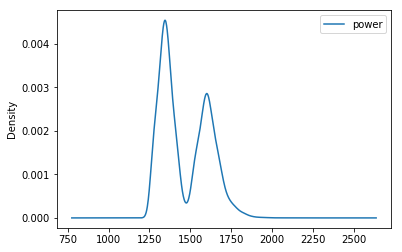

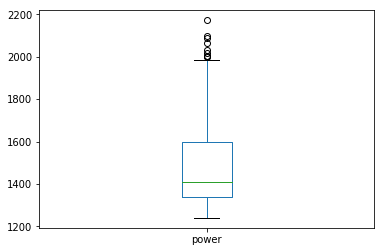

In [5]:
power.plot(kind="density")
plotter.show()
power.plot(kind="box")
plotter.show()

In [6]:
cpu = cpu.drop(cpu.columns[2], axis=1)
cpu = cpu.drop(cpu.columns[2], axis=1)
cpu = cpu.drop(cpu.columns[3], axis=1)
cpu.describe()

,cpu_value host raspberrypi_pc008 type_instance idle,cpu_value host raspberrypi_pc008 type_instance softirq,cpu_value host raspberrypi_pc008 type_instance system,cpu_value host raspberrypi_pc008 type_instance user,cpu_value host raspberrypi_pc008 type_instance wait
count,48888.000000,48884.000000,48887.000000,48887.000000,48885.000000
mean,442.398459,0.086155,2.562584,58.574709,0.058691
std,441.240831,2.674904,12.542576,300.123279,1.165943
min,287.545455,0.000000,0.000000,0.000000,0.000000
25%,367.958333,0.000000,1.625000,3.500000,0.000000
50%,491.750000,0.000000,1.958333,4.458333,0.000000
75%,492.625000,0.083333,2.333333,127.875000,0.000000
max,76160.940476,313.750000,2413.833333,53766.916667,229.100000


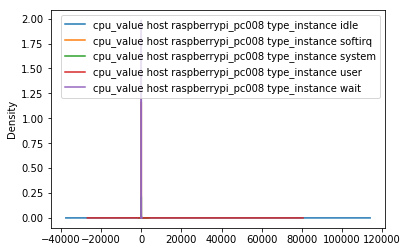

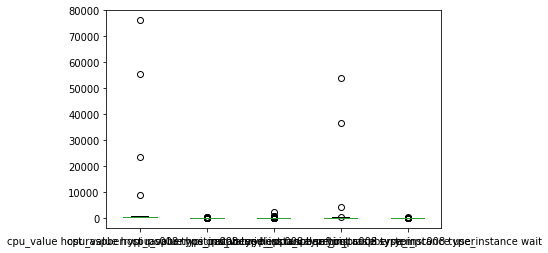

In [7]:
cpu.plot(kind="density")
plotter.show()
cpu.plot(kind="box")
plotter.show()

In [8]:
disk = disk.drop(disk.columns[2], axis=1)
disk.describe()

,disk_io_time host raspberrypi_pc008 instance mmcblk0 type disk_io_time,disk_io_time host raspberrypi_pc008 instance mmcblk0p2 type disk_io_time
count,48892.000000,48892.000000
mean,118.589306,118.589306
std,340.959719,340.958011
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,0.000000,0.000000
max,1610.000000,1610.000000


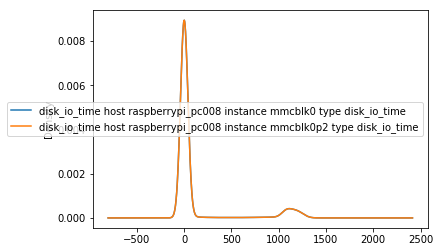

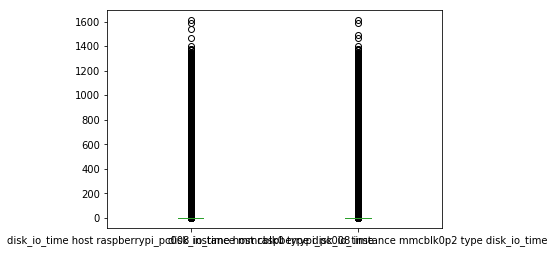

In [9]:
disk.plot(kind="density")
plotter.show()
disk.plot(kind="box")
plotter.show()

In [10]:
tx = tx.drop(tx.columns[1], axis=1)
tx = tx.drop(tx.columns[1], axis=1)
tx = tx.drop(tx.columns[1], axis=1)
tx = tx.drop(tx.columns[1], axis=1)
tx = tx.drop(tx.columns[1], axis=1)
tx = tx.drop(tx.columns[1], axis=1)
tx.describe()

,interface_tx host raspberrypi_pc008 instance wlan0 type if_octets,interface_tx host raspberrypi_pc008 instance wlan0 type if_packets
count,48892.000000,48892.000000
mean,64272.552964,56.371475
std,60157.248962,40.099041
min,12546.000000,10.666667
25%,16505.000000,25.000000
50%,17328.333333,25.833333
75%,140867.000000,107.833333
max,169240.666667,207.500000


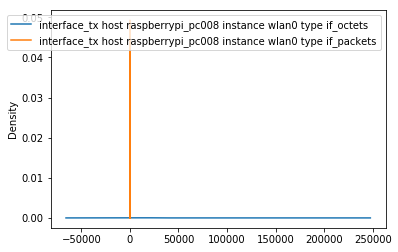

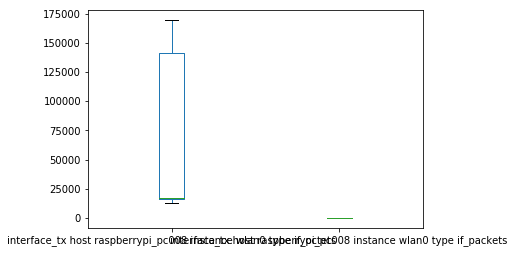

In [11]:
tx.plot(kind="density")
plotter.show()
tx.plot(kind="box")
plotter.show()

In [12]:
rx = rx.drop(rx.columns[1], axis=1)
rx = rx.drop(rx.columns[1], axis=1)
rx = rx.drop(rx.columns[1], axis=1)
rx = rx.drop(rx.columns[1], axis=1)
rx = rx.drop(rx.columns[1], axis=1)
rx = rx.drop(rx.columns[1], axis=1)
rx.describe()

,interface_rx host raspberrypi_pc008 instance wlan0 type if_octets,interface_rx host raspberrypi_pc008 instance wlan0 type if_packets
count,48892.000000,48892.000000
mean,1112.931884,9.541394
std,222.369437,1.867821
min,0.000000,0.000000
25%,1134.000000,9.500000
50%,1160.000000,10.000000
75%,1160.000000,10.000000
max,12333.333333,113.000000


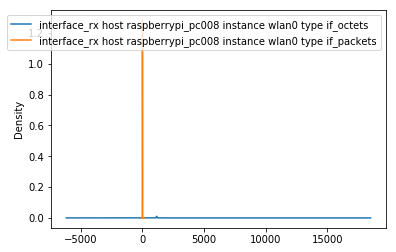

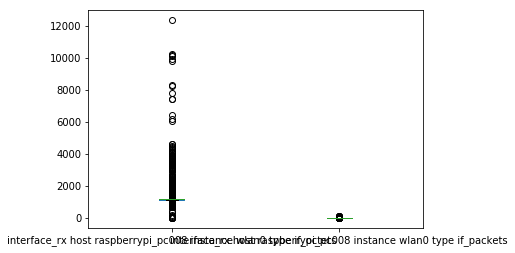

In [13]:
rx.plot(kind="density")
plotter.show()
rx.plot(kind="box")
plotter.show()

------

## Clip data within limits

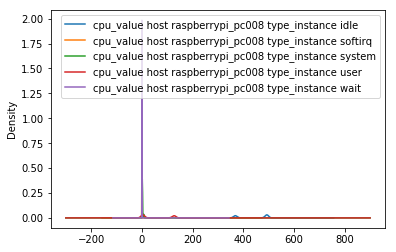

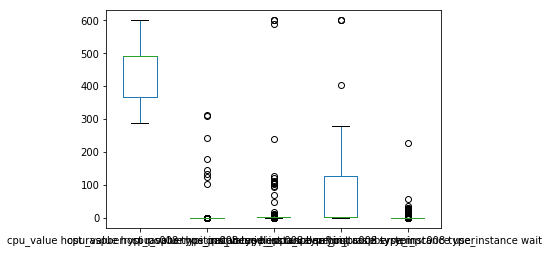

In [14]:
#cpu.drop("Time", axis=1, inplace=True)
cpu = cpu[cpu.columns[1:]].clip(0, 600)
cpu.plot(kind="density")
plotter.show()
cpu.plot(kind="box")
plotter.show()

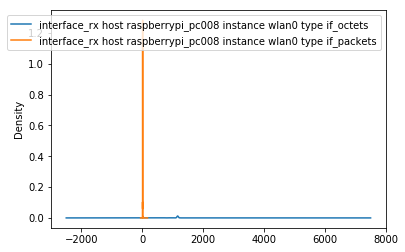

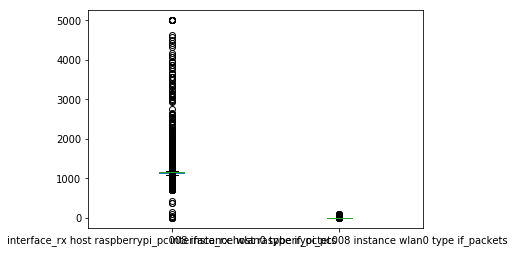

In [15]:
#rx.drop("Time", axis=1, inplace=True)
rx = rx[rx.columns[1:]].clip(0, 5000)
rx.plot(kind="density")
plotter.show()
rx.plot(kind="box")
plotter.show()

In [16]:
all_data = pandas.concat([cpu, tx, rx, context, disk, power], axis=1, join="inner").drop("Time", axis=1).fillna(0)
all_data.describe()

,cpu_value host raspberrypi_pc008 type_instance idle,cpu_value host raspberrypi_pc008 type_instance softirq,cpu_value host raspberrypi_pc008 type_instance system,cpu_value host raspberrypi_pc008 type_instance user,cpu_value host raspberrypi_pc008 type_instance wait,interface_tx host raspberrypi_pc008 instance wlan0 type if_octets,interface_tx host raspberrypi_pc008 instance wlan0 type if_packets,interface_rx host raspberrypi_pc008 instance wlan0 type if_octets,interface_rx host raspberrypi_pc008 instance wlan0 type if_packets,contextswitch_value host raspberrypi_pc008 type contextswitch,disk_io_time host raspberrypi_pc008 instance mmcblk0 type disk_io_time,disk_io_time host raspberrypi_pc008 instance mmcblk0p2 type disk_io_time,power
count,48892.000000,48892.000000,48892.000000,48892.000000,48892.000000,48892.000000,48892.000000,48892.000000,48892.000000,48892.000000,48892.000000,48892.000000,48892.000000
mean,439.066382,0.086141,2.517826,56.672720,0.058682,64272.552964,56.371475,1111.900089,9.541394,1446.570649,118.589306,118.589306,1464.445291
std,60.568759,2.674686,5.955464,59.996647,1.165860,60157.248962,40.099041,191.807952,1.867821,556.349199,340.959719,340.958011,154.399535
min,0.000000,0.000000,0.000000,0.000000,0.000000,12546.000000,10.666667,0.000000,0.000000,561.666667,0.000000,0.000000,0.000000
25%,367.958333,0.000000,1.625000,3.500000,0.000000,16505.000000,25.000000,1134.000000,9.500000,1137.833333,0.000000,0.000000,1340.243902
50%,491.750000,0.000000,1.958333,4.458333,0.000000,17328.333333,25.833333,1160.000000,10.000000,1260.833333,0.000000,0.000000,1409.756098
75%,492.625000,0.083333,2.333333,127.875000,0.000000,140867.000000,107.833333,1160.000000,10.000000,1432.833333,0.000000,0.000000,1598.475610
max,600.000000,313.750000,600.000000,600.000000,229.100000,169240.666667,207.500000,5000.000000,113.000000,15098.333333,1610.000000,1610.000000,2171.951220


In [17]:
all_data.shape

(48892, 13)

## Recale Data between 0 and 1

In [18]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from random import shuffle

scaler = MinMaxScaler()
sscaler = StandardScaler()
columns = list(map(lambda x: x.split()[-1], all_data.columns))
columns[-2] = "disk_io_p2"

all_data = pandas.DataFrame(scaler.fit_transform(all_data.as_matrix()), columns=columns)

all_data.head(5)

,idle,softirq,system,user,wait,if_octets,if_packets,if_octets,if_packets,contextswitch,disk_io_time,disk_io_p2,power
0,0.812222,0.000531,0.008611,0.010208,0.000000,0.037073,0.121084,0.371200,0.141593,0.058989,0.000000,0.000000,0.0
1,0.812361,0.000000,0.008472,0.010069,0.000000,0.042055,0.148180,0.461067,0.179941,0.068895,0.000000,0.000000,0.0
2,0.812014,0.000000,0.006944,0.010556,0.000000,0.045478,0.147333,0.458133,0.182891,0.067496,0.000000,0.000000,0.0
3,0.788125,0.000531,0.013333,0.026667,0.000000,0.050690,0.165961,0.510867,0.212389,0.088982,0.000000,0.000000,0.0
4,0.790625,0.000266,0.012083,0.025833,0.000546,0.067298,0.233700,0.833733,0.398230,0.120328,0.006211,0.006211,0.0


## Write Data loaders

In [19]:
class DataLoader:
    """
        Defines data loader for seq2point model.
    """
    
    def __init__(self, X, window=5):
        self.X = X
        self.window = window
        
    def __len__(self):
        return (self.X.shape[0]-(self.window+1))
    
    def __getitem__(self, i):
        """
            Returns single batch of data in flat seq2point compatible format.
        """
        X = self.X[i: i+self.window]
        y = self.X[i: i+self.window]
        
        return (X, y)


class BatchLoader:
    """
        Creates batches from data provided by dataloader.
    """
    
    def __init__(self, dataloader, batch_size=32, random=False):
        self.dloader = dataloader
        self.batch_size = batch_size
        self.samples = list(range(len(self.dloader)))
        self.random = random
        
    def __len__(self):
        return int(len(self.dloader)/self.batch_size) - 1
        
    def __getitem__(self, i):
        i = i*self.batch_size
        _samples = self.samples[i: i+self.batch_size]
        
        if self.random:
            shuffle(_samples)
        
        X=[]
        y=[]
        
        for j in range(len(_samples)):
            _X, _y = self.dloader[_samples[j]]
            X.append(_X.ravel())
            y.append(_y)
        
        return numpy.array(X), numpy.array(y)

In [20]:
class ConvBatchLoader:
    """
        Creates conv batches from data provided by dataloader.
    """
    
    def __init__(self, dataloader, batch_size=32):
        self.dloader = dataloader
        self.batch_size = batch_size
        self.samples = list(range(len(self.dloader)))
        
    def __len__(self):
        return int(len(self.dloader)/self.batch_size) - 1
        
    def __getitem__(self, i):
        i = i*self.batch_size
        _samples = self.samples[i: i+self.batch_size]
        shuffle(_samples)
        
        X=[]
        y=[]
        
        for j in range(len(_samples)):
            _X, _y = self.dloader[_samples[j]]
            X.append(_X)
            y.append(_y)
        
        return numpy.array(X), numpy.array(y)

### Model

In [70]:
from keras.layers import Conv1D, Input, Dense, Flatten, MaxPooling1D, LSTM, Concatenate, UpSampling1D
from keras.models import Model
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.metrics import mean_absolute_error

In [71]:
_input = Input(shape=(128, 1))

conv = Conv1D(kernel_size=5, filters=50, activation="relu", padding="same")(_input)
conv = MaxPooling1D(pool_size=2)(conv)

conv = Conv1D(kernel_size=5, filters=20, activation="relu", padding="same")(conv)
conv = MaxPooling1D(pool_size=2)(conv)

conv = Conv1D(kernel_size=5, filters=10, activation="relu", padding="same")(conv)
conv = MaxPooling1D(pool_size=2)(conv)

conv = Conv1D(kernel_size=3, filters=5, activation="relu", padding="same")(conv)
conv = MaxPooling1D(pool_size=2)(conv)

conv = Conv1D(kernel_size=3, filters=5, activation="relu", padding="same")(conv)
conv = MaxPooling1D(pool_size=2)(conv)

conv = Conv1D(kernel_size=3, filters=2, activation="relu", padding="same")(conv)
conv = MaxPooling1D(pool_size=2)(conv)

encoded = Conv1D(kernel_size=3, filters=1, activation="sigmoid", padding="same")(conv)

upconv = UpSampling1D(size=2)(encoded)
conv = Conv1D(kernel_size=3, filters=2, activation="relu", padding="same")(upconv)

upconv = UpSampling1D(size=2)(conv)
conv = Conv1D(kernel_size=3, filters=5, activation="relu", padding="same")(upconv)

upconv = UpSampling1D(size=2)(conv)
conv = Conv1D(kernel_size=3, filters=5, activation="relu", padding="same")(upconv)

upconv = UpSampling1D(size=2)(conv)
conv = Conv1D(kernel_size=5, filters=10, activation="relu", padding="same")(upconv)

upconv = UpSampling1D(size=2)(conv)
conv = Conv1D(kernel_size=5, filters=20, activation="relu", padding="same")(upconv)

upconv = UpSampling1D(size=2)(conv)
conv = Conv1D(kernel_size=5, filters=50, activation="relu", padding="same")(upconv)

output = Conv1D(kernel_size=1, filters=1, activation="sigmoid", padding="same")(conv)

In [72]:
encoder = Model(inputs=_input, outputs=encoded)
model = Model(inputs=_input, outputs=output)
model.compile(loss="mean_squared_error", optimizer="adam", metrics=["mean_absolute_error"])

In [73]:
loader = ConvBatchLoader(dataloader=DataLoader(X=all_data["power"].as_matrix()[:40000, numpy.newaxis], window=128), batch_size=64)
print(loader[0][0].shape)
print(loader[0][1].shape)

(64, 128, 1)
(64, 128, 1)


In [74]:
def data_gen():
    while 1:
        for i in range(len(loader)):
            yield loader[i]

In [75]:
val_loader = ConvBatchLoader(dataloader=DataLoader(X=all_data["power"].as_matrix()[40000:41000, numpy.newaxis], window=128), batch_size=1000)
_data_gen = data_gen()
val_data = val_loader[0]
estopper = EarlyStopping(monitor="val_loss", patience=10)
#sch = ReduceLROnPlateau(factor=0.1, min_lr=0.00001, patience=5)
model.fit_generator(callbacks=[estopper], generator=_data_gen, validation_data=val_data, shuffle=True, steps_per_epoch=100, epochs=100)

Epoch 1/100
100/100 [==============================] - 5s 53ms/step - loss: 0.0087 - mean_absolute_error: 0.0742 - val_loss: 0.0045 - val_mean_absolute_error: 0.0581
Epoch 2/100
100/100 [==============================] - 4s 37ms/step - loss: 0.0046 - mean_absolute_error: 0.0599 - val_loss: 0.0041 - val_mean_absolute_error: 0.0581
Epoch 3/100
100/100 [==============================] - 4s 38ms/step - loss: 0.0049 - mean_absolute_error: 0.0613 - val_loss: 0.0041 - val_mean_absolute_error: 0.0581
Epoch 4/100
100/100 [==============================] - 4s 37ms/step - loss: 0.0049 - mean_absolute_error: 0.0625 - val_loss: 0.0042 - val_mean_absolute_error: 0.0584
Epoch 5/100
100/100 [==============================] - 4s 39ms/step - loss: 0.0049 - mean_absolute_error: 0.0623 - val_loss: 0.0042 - val_mean_absolute_error: 0.0577
Epoch 6/100
100/100 [==============================] - 4s 38ms/step - loss: 0.0044 - mean_absolute_error: 0.0595 - val_loss: 0.0042 - val_mean_absolute_error: 0.0584
Epoc

In [76]:
loader = ConvBatchLoader(dataloader=DataLoader(X=all_data["power"].as_matrix()[41000:, numpy.newaxis], window=128), batch_size=5000)
print(loader[0][0].shape)

(5000, 128, 1)


In [77]:
transformed = encoder.predict(loader[0][0])
print(transformed.dtype)

float32


In [78]:
import matplotlib.pyplot as plotter

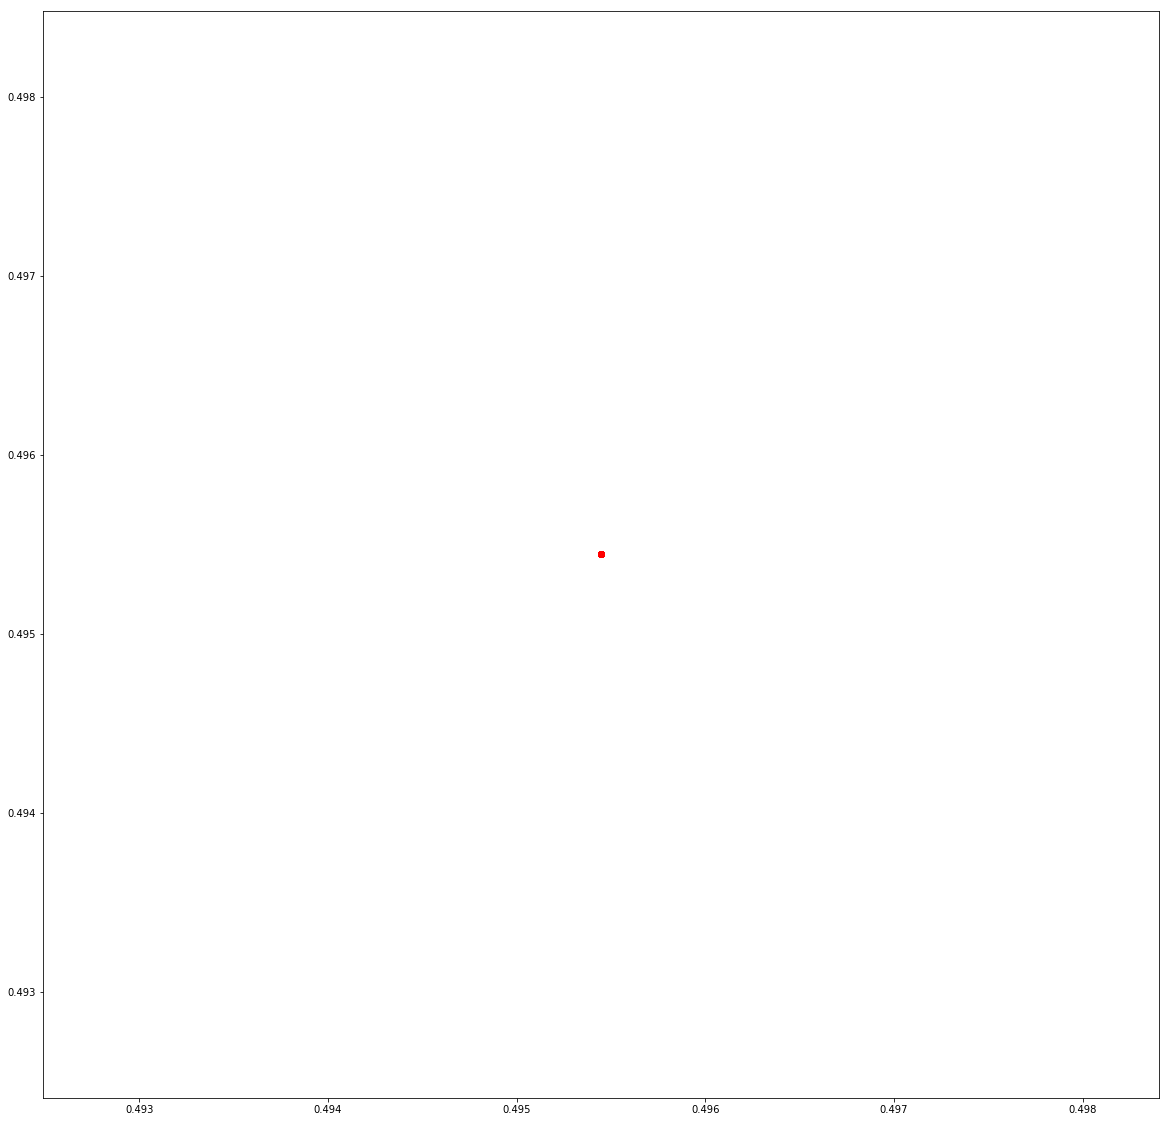

In [80]:
fig = plotter.figure(figsize=(20,20))
plotter.scatter(transformed[:,1,0], transformed[:,0,0], c='r', alpha=0.5)
plotter.show()

In [87]:
import time
for i in range(10):
    print(i, end="\r")